# Scenario
This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity. 

Some goals of this project:
1.	What items customers buy the most and are there any items we should ignore?
2.	What is our strategy to increase sales based on our export destination countries?
3.	Do customer segmentation appropriately. Please explain in detail and completely
4.	Get the hidden insight from the data


# Import Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Load Data

In [54]:
data = pd.read_csv('ML_2_Fellow.csv', encoding='latin1')

# Check Data Summary

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


# Check Null and Duplicate Values

In [180]:
data.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [182]:
data.duplicated().sum()

5268

# Drop Null Values

In [392]:
df = data.copy()

In [393]:
#Show that as much as 6035 data failed to parse
df[:][df['Kode_Barang'].isnull()]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


I decided to drop the error parse data because I was confused about how to fix it

In [394]:
#Drop data that failed to parse and null
df = df.dropna(subset=['Kode_Barang','Barang','Kode_Pelanggan'])

In [395]:
#Check again
df.isnull().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

# Check Outlier

Text(0.5, 1.0, 'Harga Satuan')

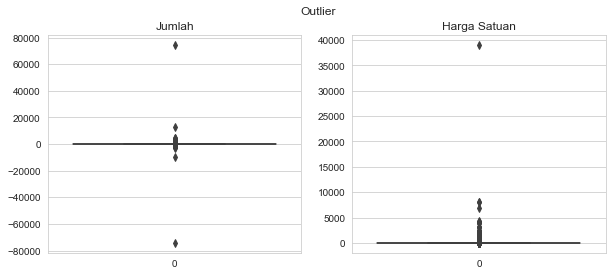

In [396]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Outlier')
plt.subplot(121)
plt.title('Jumlah')
sns.boxplot(data=df['Jumlah'])
plt.subplot(122)
sns.boxplot(data=df['Harga_Satuan'])
plt.title('Harga Satuan')

## Jumlah Column

In [397]:
#Show Outlier in Jumlah column
df[df['Jumlah']<0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [398]:
#Change negative number to positive, i dont know why negative. But I think an error occurred
df['Jumlah'] = df['Jumlah'].abs()

In [399]:
#Check again
df[df['Jumlah']<0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


## Harga Satuan Column

In [402]:
#Show Harga Satuan = 0 
df[df['Harga_Satuan']==0].head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom


In [406]:
#Select all data value, except 0 in Harga Satuan column
df = df[df['Harga_Satuan'] != 0]
#Check again
df[df['Jumlah']<0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


In [677]:
#Show data value more than 50000 
df[df['Jumlah']>50000]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,77183.6,77183.6


# Change Data Type

In [424]:
df['Tanggal_Transaksi'] =  pd.to_datetime(df['Tanggal_Transaksi'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403142 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kode_Bayar         403142 non-null  object        
 1   Kode_Barang        403142 non-null  object        
 2   Barang             403142 non-null  object        
 3   Jumlah             403142 non-null  float64       
 4   Tanggal_Transaksi  403142 non-null  datetime64[ns]
 5   Harga_Satuan       403142 non-null  float64       
 6   Kode_Pelanggan     403142 non-null  float64       
 7   Negara             403142 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 27.7+ MB


In [571]:
df['Sales'] = df['Jumlah']*df['Harga_Satuan']

In [572]:
dfc = df.copy()

# Objective
I deleted 138767

## What items customers buy the most and are there any items we should ignore?

In [691]:
#Most Buy Items based on Frequent
freq_item = dfc['Barang'].value_counts().reset_index()
freq_item.columns = ['Barang','Freq']
freq_item_b = freq_item.sort_values(by='Freq', ascending=False).head(3)
freq_item_b

,Barang,Freq
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1904
2,JUMBO BAG RED RETROSPOT,1662


Text(0.5, 1.0, 'Top 3 Most Buy Item Based on Number of Order')

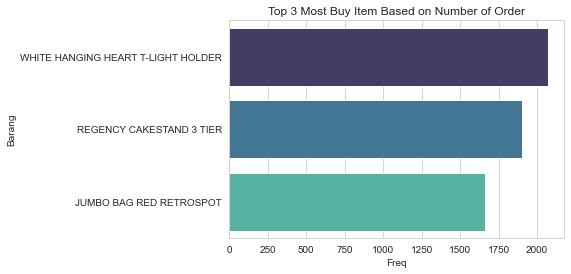

In [688]:
#Plot Most Buy Items based on Frequent
sns.barplot(x='Freq', y='Barang', data=freq_item_b, orient='h', palette='mako')
plt.title('Top 3 Most Buy Item Based on Number of Order')

,index,Barang,Total_Jumlah
0,1929,MEDIUM CERAMIC TOP STORAGE JAR,152410.0
1,3703,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55615.0
2,1727,JUMBO BAG RED RETROSPOT,47296.0
3,3615,WHITE HANGING HEART T-LIGHT HOLDER,39303.0
4,208,ASSORTED COLOUR BIRD ORNAMENT,35410.0
5,2204,PACK OF 72 RETROSPOT CAKE CASES,33977.0


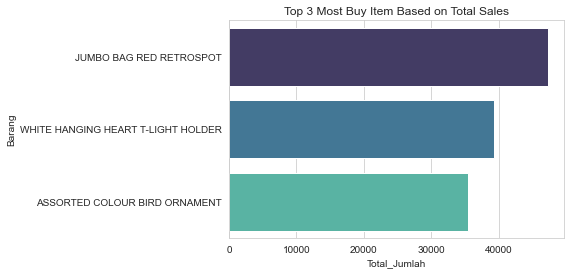

In [690]:
#Most Buy Items based on Total Number
total_item = dfc.groupby(['Barang'])['Jumlah'].sum().reset_index()
total_item.columns = ['Barang','Total_Jumlah']
plot_total_item_b = total_item.sort_values(by='Total_Jumlah', ascending=False).reset_index().head(6)
sns.barplot(x='Total_Jumlah', y='Barang', data=plot_total_item_b.iloc[2:5], orient='h', palette='mako')
plt.title('Top 3 Most Buy Item Based on Total Sales')
plot_total_item_b

C:\Users\Windows\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Jumlah', ylabel='Density'>

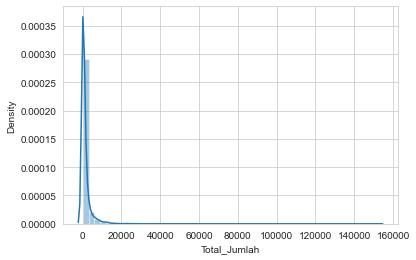

In [555]:
#Distribution plot of total number
sns.distplot(total_item['Total_Jumlah'])

,Number_of_Purchases,Number_of_Transactions
0,1,192
1,2,151
2,3,116
3,4,81
4,5,78
...,...,...
528,764,1
529,788,1
530,800,1
531,814,1


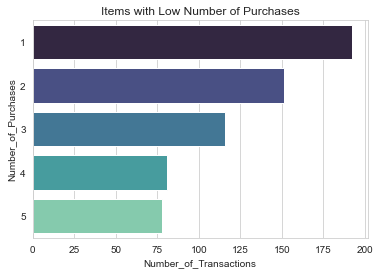

In [704]:
freq_item_ignored = freq_item.sort_values(by='Freq')
ignored = freq_item_ignored['Freq'].value_counts().reset_index()
ignored.columns = ['Number_of_Purchases', 'Number_of_Transactions']
sns.barplot(x='Number_of_Transactions', y='Number_of_Purchases', data=ignored.iloc[0:5], orient='h', palette='mako')
plt.title('Items with Low Number of Purchases')
ignored

## What is our strategy to increase sales based on our export destination countries?

,Negara,Freq
0,United Kingdom,358481
1,Germany,9446
2,France,8458
3,EIRE,7426
4,Spain,2512


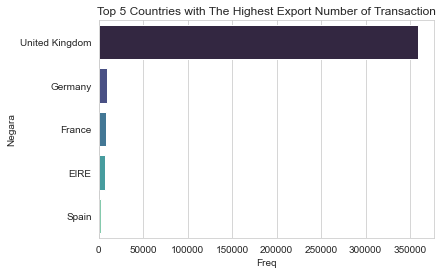

In [707]:
freq_country = dfc['Negara'].value_counts().reset_index()
freq_country.columns = ['Negara','Freq']
freq_country_h = freq_country.sort_values(by='Freq', ascending=False).head()
sns.barplot(x='Freq', y='Negara', data=freq_country_h, orient='h', palette='mako')
plt.title('Top 5 Countries with The Highest Export Number of Transaction')
freq_country_h

Text(0.5, 1.0, '10 countries with The Lowest Export Transaction Frequency')

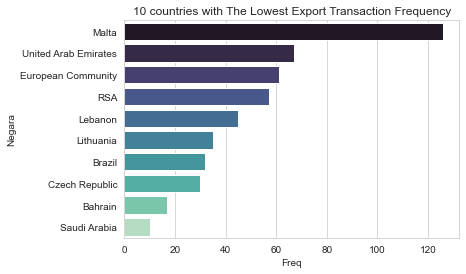

In [708]:
freq_country_l = freq_country.sort_values(by='Freq', ascending=False).tail(10)
sns.barplot(x='Freq', y='Negara', data=freq_country_l, orient='h', palette='mako')
plt.title('10 countries with The Lowest Export Transaction Frequency')

## Do customer segmentation appropriately. Please explain in detail and completely

### Represent a single customers purchase history

In [664]:
#Transform data that represent a single customers purchase history
customer_df = dfc.groupby('Kode_Pelanggan').agg({'Sales':sum,'Kode_Bayar': lambda x: x.nunique()})
customer_df.columns = ['Total_Sales','Freq_Order']
customer_df['AvgOrderValue'] = customer_df['Total_Sales']/customer_df['Freq_Order']

In [667]:
#Normalized Data
rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(5)

,Total_Sales,Freq_Order,AvgOrderValue
Kode_Pelanggan,,,
12346.0,1.728285,-0.691314,1.731456
12347.0,1.453979,1.026665,1.413547
12348.0,0.919638,0.344864,1.120214
12349.0,0.897440,-1.731456,1.694195
12350.0,-0.743638,-1.730663,0.620756


In [668]:
#Silhouette coefficient to determine the best number of clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['Total_Sales', 'Freq_Order', 'AvgOrderValue']])
    
    silhouette_avg = silhouette_score(
        normalized_df[['Total_Sales', 'Freq_Order', 'AvgOrderValue']], 
        kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4106
Silhouette Score for 5 Clusters: 0.3770
Silhouette Score for 6 Clusters: 0.3743
Silhouette Score for 7 Clusters: 0.3751
Silhouette Score for 8 Clusters: 0.3573


In [669]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['Total_Sales', 'Freq_Order', 'AvgOrderValue']])
four_cluster_df = normalized_df[['Total_Sales', 'Freq_Order', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head(5)

,Total_Sales,Freq_Order,AvgOrderValue,Cluster
Kode_Pelanggan,,,,
12346.0,1.728285,-0.691314,1.731456,3
12347.0,1.453979,1.026665,1.413547,3
12348.0,0.919638,0.344864,1.120214,3
12349.0,0.897440,-1.731456,1.694195,1
12350.0,-0.743638,-1.730663,0.620756,1


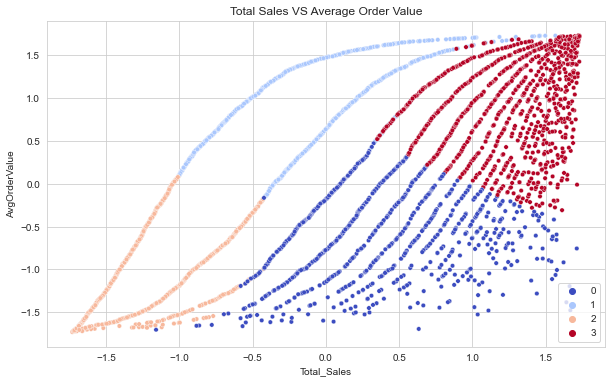

In [670]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total_Sales", y="AvgOrderValue", hue="Cluster", data=four_cluster_df, 
                palette='coolwarm', s=20);
plt.title('Total Sales VS Average Order Value')
plt.legend(loc='lower right');

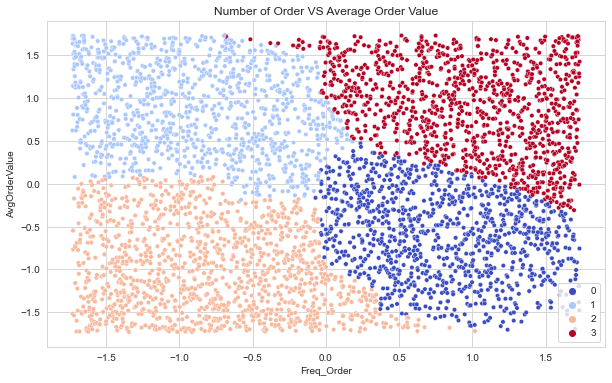

In [710]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Freq_Order", y="AvgOrderValue", hue="Cluster", data=four_cluster_df, 
                palette='coolwarm', s=20);
plt.title('Number of Order VS Average Order Value')
plt.legend(loc='lower right');

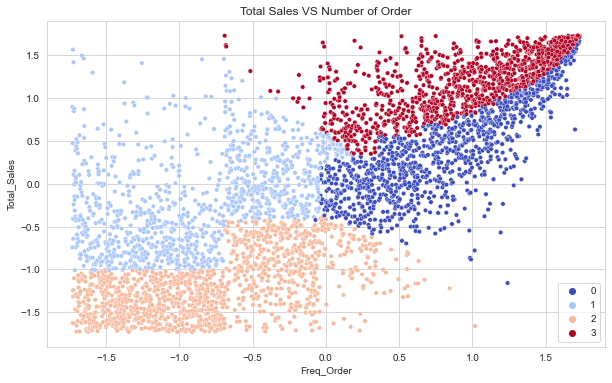

In [712]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Freq_Order", y="Total_Sales", hue="Cluster", data=four_cluster_df, 
                palette='coolwarm', s=20);
plt.title('Total Sales VS Number of Order')
plt.legend(loc='lower right');

,cluster,number_of_customer
0,2,1251
1,3,1086
2,1,1035
3,0,997


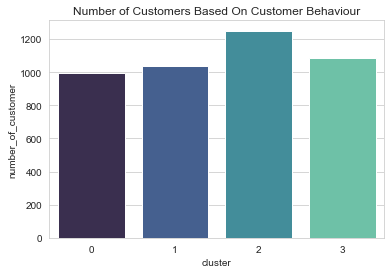

In [718]:
total_cluster = four_cluster_df['Cluster'].value_counts().reset_index()
total_cluster.columns = ['cluster','number_of_customer']
sns.barplot(x='cluster', y='number_of_customer', data=total_cluster, palette='mako')
plt.title('Number of Customers Based On Customer Behaviour')
total_cluster

In [731]:
best_customer = customer_df.sort_values(by='Total_Sales',ascending=False).head(5)
best_customer

,Total_Sales,Freq_Order,AvgOrderValue
Kode_Pelanggan,,,
14646.0,279505.58,76,3677.705000
18102.0,262876.11,62,4239.937258
17450.0,201619.41,55,3665.807455
14911.0,154505.03,248,623.004153
12346.0,154367.20,2,77183.600000


Text(0.5, 1.0, 'Top 5 Best Customer')

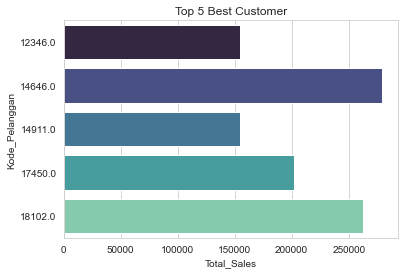

In [730]:
sns.barplot(x='Total_Sales', y=best_customer.index, data=best_customer, orient='h',palette='mako')
plt.title('Top 5 Best Customer')